<a href="https://colab.research.google.com/github/NHoangThanh/AI-assignment/blob/main/ANN_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

so:[9]


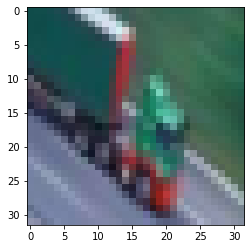

In [14]:
from keras.datasets import cifar10
(x_train,y_train),(x_test,y_test) = cifar10.load_data()
import matplotlib.pyplot as plt
hinh = x_train[50]
plt.imshow(hinh, cmap = plt.cm.binary)
plt.show
print('so:{}' .format(y_train[50]))

In [15]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [17]:
from keras import models
from keras.layers import Dense

from keras.models import Sequential

model = Sequential()


model.add(Dense(512,activation='relu', input_shape = (32*32*3,)))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 512)               1573376   
                                                                 
 dense_10 (Dense)            (None, 256)               131328    
                                                                 
 dense_11 (Dense)            (None, 128)               32896     
                                                                 
 dense_12 (Dense)            (None, 10)                1290      
                                                                 
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [18]:
x_train = x_train.reshape((50000, 32*32*3,1))
x_train = x_train.astype('float32')/255
x_test = x_test.reshape((10000, 32*32*3,1))
x_test = x_test.astype('float32')/255

from keras.utils import to_categorical #ma hoa One hot encoding
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [20]:
model.compile(optimizer ='rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.fit(x_train, y_train,epochs = 50, batch_size = 128)
test_loss, test_acc = model.evaluate(x_test, y_test)
print('do chinh xac', test_acc)
print('ham mat mat', test_loss)

Epoch 1/50
391/391 [==============================] - 12s 27ms/step - loss: 1.6540 - accuracy: 0.4092
Epoch 2/50
391/391 [==============================] - 9s 22ms/step - loss: 1.5872 - accuracy: 0.4337
Epoch 3/50
391/391 [==============================] - 9s 23ms/step - loss: 1.5482 - accuracy: 0.4451
Epoch 4/50
391/391 [==============================] - 9s 24ms/step - loss: 1.5087 - accuracy: 0.4601
Epoch 5/50
391/391 [==============================] - 9s 24ms/step - loss: 1.4721 - accuracy: 0.4737
Epoch 6/50
391/391 [==============================] - 9s 22ms/step - loss: 1.4424 - accuracy: 0.4837
Epoch 7/50
391/391 [==============================] - 9s 23ms/step - loss: 1.4135 - accuracy: 0.4943
Epoch 8/50
391/391 [==============================] - 9s 23ms/step - loss: 1.3857 - accuracy: 0.5040
Epoch 9/50
391/391 [==============================] - 9s 24ms/step - loss: 1.3641 - accuracy: 0.5135
Epoch 10/50
391/391 [==============================] - 9s 22ms/step - loss: 1.3425 - accur

In [21]:
classes_keys = {0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer',
                5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}

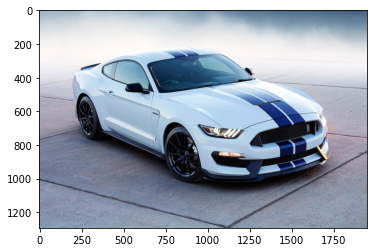

In [27]:
from keras.utils import load_img
url = 'car.jpg'
img = load_img(url)
plt.imshow(img)

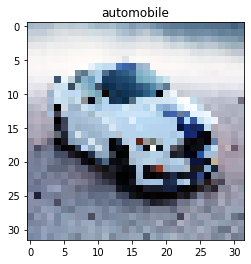

In [28]:
from keras.utils import load_img, img_to_array
import numpy as np
img = load_img(url, target_size=(32,32))
plt.imshow(img)

# From image to array to predict
img = img_to_array(img)
img = img.astype('float32')
img = img/255
pred_value = np.argmax(model.predict(img.reshape(1, 32*32*3), verbose=False),)

# Check the class
for keys in classes_keys.keys():
  if pred_value == keys:
    plt.title(classes_keys[keys])
    break
  else:
    continue